## Credit Card Retention Analysis

This is a hands-on practice course offered by Linkeding Learning and integrated with GitHub Codespaces. 

### Dataset Description

- This dataset consists of 10,127 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features
- 16.07% of customers have churned
- [Dataset link](https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction)

### Imports

In [104]:
pip install Pandas

In [105]:
!pip install numpy 
!pip install seaborn


In [106]:
pip install Matplotlib

Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install Plotly

Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [109]:
from plotly import graph_objs as go

In [110]:
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

### Reading in Dataset

In [111]:
data = pd.read_csv("C:\Data Engineer\Portfolio - Data Science\Python\practical-python-for-data-professionals-4358485\data\BankChurners_v2.csv")

In [112]:
data.shape

(10127, 23)

In [113]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,90032,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,90033,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,90034,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,90035,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,90036,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [114]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## General Cleaning Techniques

### Checking for duplicates

In [115]:
#check how many rows there are
data.shape

(10127, 23)

In [116]:
#check for unique ids
data['CLIENTNUM'].nunique()

10127

In [117]:
data.drop_duplicates(inplace=True)

In [118]:
data.shape 

(10127, 23)

No duplicates based on CLIENTNUM -- good to go! 

### Subsetting Data

In [119]:
#Check column names and see if it is necessary to change any names or subset of data
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [120]:
#exclude the naive_bayes columns as they were added after (name is too big)
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]


### Datatypes

In [121]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Missing Values

In [122]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Education_level, Marital_Status, Income_category are showing all missing values, but since thez are categorigal calues we can replace them with a string called unknown. However, if we are dealing with numerical missing values we would like to input, or fill in the missing records with a mean or median for example.

In [123]:
#check what rows are being impacted with the missing values, and if there is any trend
data[data['Education_Level'].isna()]


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,NaN,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,NaN,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


To fill in the missing values, we will use the following code:

In [124]:
data['Education_Level'] = data['Education_Level'].fillna("Unknown")
data['Marital_Status'] = data['Marital_Status'].fillna("Unknown")
data['Income_Category'] = data['Income_Category'].fillna("Unknown")

Check that the code did what was expected:

In [125]:
data[data['Education_Level']== 'Unknown']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [126]:
data[data['Marital_Status']== 'Unknown']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,90035,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
7,90039,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,90042,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,90045,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
15,90047,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,100102,Existing Customer,47,M,3,High School,Unknown,$80K - $120K,Silver,40,5,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
10100,100132,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,4,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10101,100133,Existing Customer,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,3,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
10118,100150,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [127]:
data[data['Income_Category']== 'Unknown']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,90051,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
28,90060,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
39,90071,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
44,90076,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
58,90090,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,4,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,100053,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,100072,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,4,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10083,100115,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,4,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000
10092,100124,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,1,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


In [128]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Data Transformation : Binning

To bin our ages, we will need a couple data point: the min and max ages.

In [129]:
print(data['Customer_Age'].min())

26


In [130]:
print(data['Customer_Age'].max())

73


For more information, see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

In [131]:
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s','30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins']= pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [132]:
data[data['Customer_Age']==30]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins
789,90821,Existing Customer,30,M,2,High School,Married,Less than $40K,Blue,23,4,2,0,2997.0,1393,1604.0,1.120,1577,35,0.522,0.465,30s
803,90835,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,17,3,3,2,7906.0,1631,6275.0,0.889,1946,45,0.552,0.206,30s
890,90922,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243,30s
939,90971,Existing Customer,30,M,1,Graduate,Married,$80K - $120K,Blue,19,5,3,2,9959.0,2377,7582.0,1.100,1560,39,0.696,0.239,30s
974,91006,Existing Customer,30,M,0,Graduate,Unknown,$60K - $80K,Blue,36,3,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,100030,Existing Customer,30,F,0,College,Married,Less than $40K,Blue,19,4,2,3,4184.0,1254,2930.0,0.549,14999,110,0.719,0.300,30s
10004,100036,Existing Customer,30,F,1,High School,Single,Less than $40K,Blue,23,3,2,2,3955.0,2352,1603.0,0.779,16423,109,0.758,0.595,30s
10021,100053,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,30s
10055,100087,Attrited Customer,30,M,0,Graduate,Single,Less than $40K,Silver,36,4,3,3,12833.0,0,12833.0,0.853,9619,75,0.786,0.000,30s


## EDA (Exploratory vs explanatory)

### Sanity Checks

Check that 16% of the customers are attrited customers

In [133]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [134]:
#divide the total number of attrited customers by the number of customers. Since the data has no duplicates, each row represents a costumer, therefore using shape function we can retrieve the number of rows by using 0
data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0]

np.float64(0.1606596227905599)

If we wanted to keep this in our file to dynamically change if our dataset changesm we can write the following code:

In [135]:
print(round(data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0]*100, 2), "% of our customers have churned")

16.07 % of our customers have churned


### Summary Statistics

Typically, we are looking to understand:

1. how many instances are in the dataset (frequency or counts)
2. a measure of central tendency (mean, median, mode)
3. the spread of the dataset (variance, standard deviation)

The  **mean** is the average of all values in the dataset, while the **median** represents the midpoint of the values (50% above and 50% below)

In [136]:
y = list(range(0, 110, 10))
print(y)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [137]:
#calculate the mean: leverage numpy library
print(np.mean(y))

50.0


In [138]:
#calculate the median
np.median(y)

np.float64(50.0)

If I add one more data point to the set, 900, lets see how things change:

In [139]:
y.append(900)
print(y)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 900]


In [140]:
np.mean(y) #the mean is much more sensitive to outliers than the median

np.float64(120.83333333333333)

In [141]:
np.median(y)

np.float64(55.0)

In Python, we can use **.describe()** method to see these metrics for all the numerical variables in the dataset including: quartile, min, max and 

In [142]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,95095.000000,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,90032.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,92563.500000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,95095.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,97626.500000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,100158.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Here we can see things like:
- The longest customer in the dataset has been around for 56 months or about 4 year and a half. (Max)
- The average number of relationships a customer has is ~4 (mean and median agree here)
- The average credit limit is $8.6K, but the median credit limit is much lower at$4.5K (signals some skew in this variable)

In [143]:
print('The average Total_Relationship_Count is',round(np.mean(data['Total_Relationship_Count']),2) , 'and the median is',round(np.median(data['Total_Relationship_Count']),2) )  

The average Total_Relationship_Count is 3.81 and the median is 4.0


In [144]:
print('The average Credit_Limit is $', round(np.mean(data['Credit_Limit']),2) , 'and the median is $', round(np.median(data['Credit_Limit']),2))

The average Credit_Limit is $ 8631.95 and the median is $ 4549.0


### Distributions

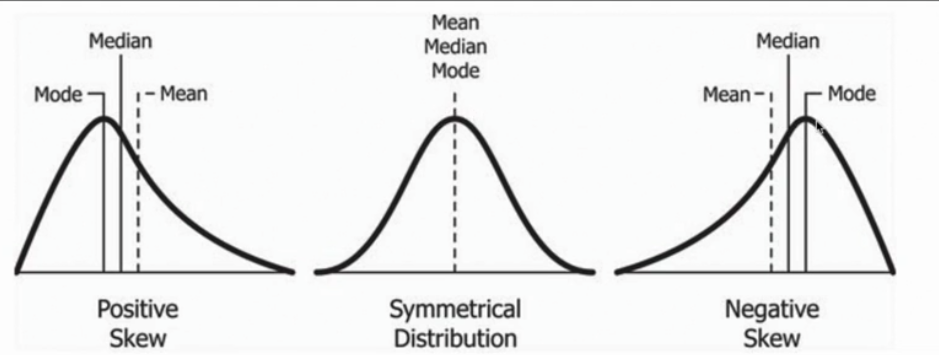

Customer Age

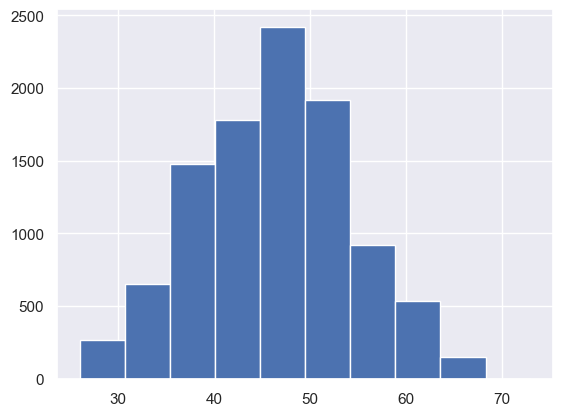

In [145]:
#use matplotlib package
plt.hist(data['Customer_Age']);

Months_on_book

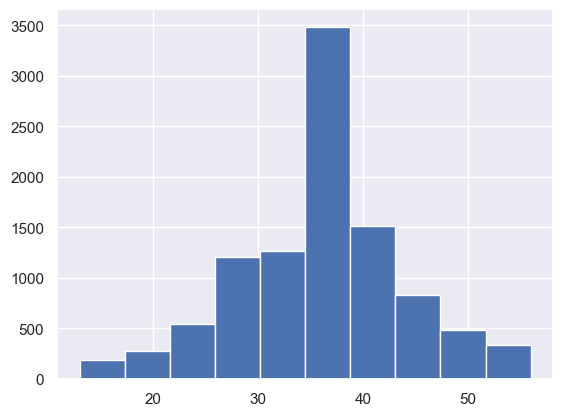

In [146]:
#check the distribution
plt.hist(data['Months_on_book']);

It looks very normal distribution with a very strong peak at about 36 months. Roughly 3500 customers have come in around this time. If we had access to the owner of the dataset to ask more questions about this, we would want to know if this was a data error, default data entry for all customer that did not have a data entry or a marketing campaing 

Credit Limit

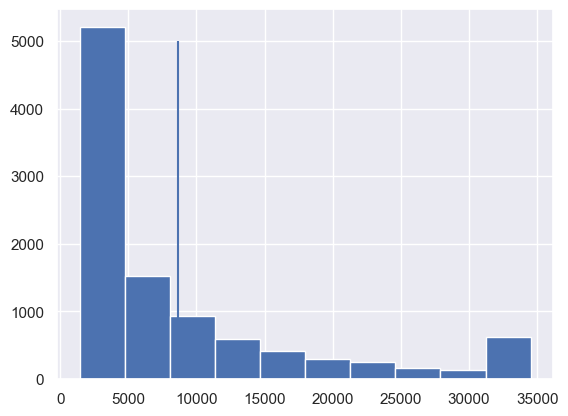

In [147]:
plt.hist(data['Credit_Limit'])
#add vertical lines at the mean and median
plt.vlines(data['Credit_Limit'].mean(),0, 5000)
plt.vlines(data['Credit_Limit'].median(),0, 5000);

In [148]:
data['Credit_Limit'].mean()

np.float64(8631.953698034955)

In [149]:
data['Credit_Limit'].median()

np.float64(4549.0)

Adjusting some parameters to make the visualization more meaningful

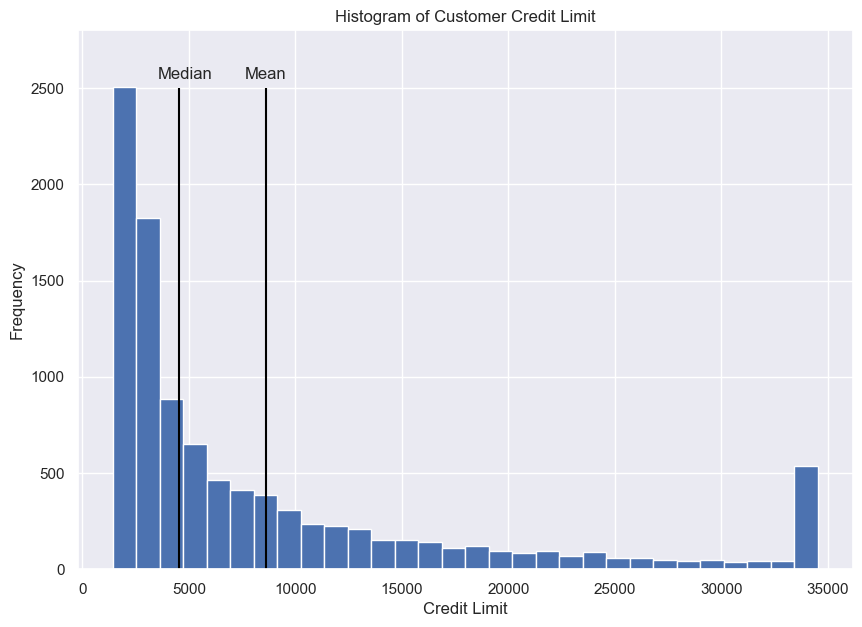

In [150]:
#increasing the figure size and number of bins (default is set to 10)
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins=30)

#changing the limits of the vertical lines
plt.vlines(data['Credit_Limit'].mean(), 0,2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0,2500, colors='Black')

#plt.text function places the text at the given coordinates (Subtracts 1000 from the median value, and Adds 50 to 2500 )
plt.text(data['Credit_Limit'].mean()-1000,2500+50, "Mean") 
plt.text(data['Credit_Limit'].median()-1000,2500+50, "Median")

plt.ylim(0,2800)
plt.title("Histogram of Customer Credit Limit")
plt.ylabel('Frequency')
plt.xlabel('Credit Limit');

The distribution is skewed to the right(positive skew) and it is also validated as the mean shifts to the right from the median. 

Total Transaction Count - Total_Trans_Ct

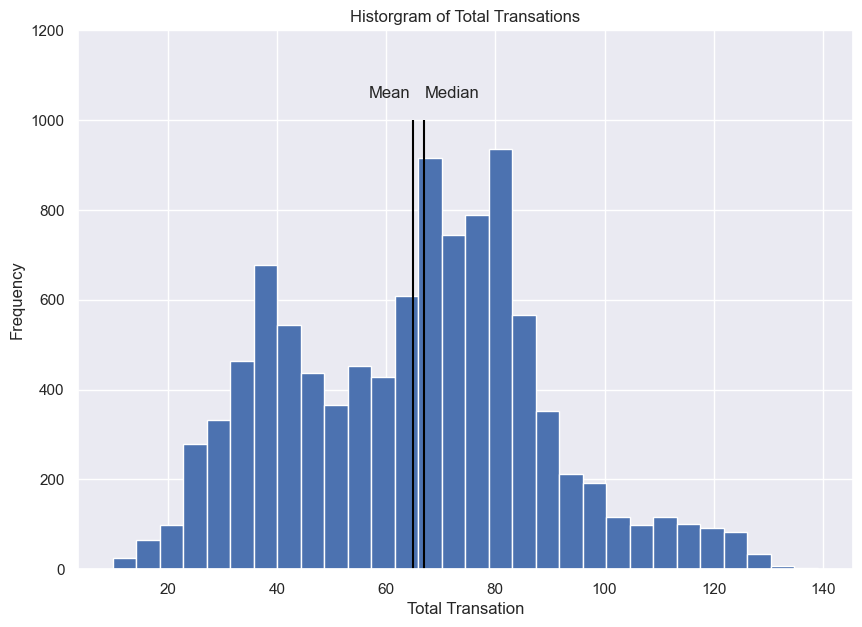

In [151]:
plt.figure(figsize=(10,7))
plt.hist(data['Total_Trans_Ct'], bins=30)

plt.vlines(data['Total_Trans_Ct'].mean(),0, 1000, colors='Black')
plt.vlines(data['Total_Trans_Ct'].median(),0, 1000, colors='Black')

plt.text(data['Total_Trans_Ct'].mean()-8, 1000+50, 'Mean')
plt.text(data['Total_Trans_Ct'].median(), 1000+50, 'Median')

plt.ylim(0,1200)
plt.title('Historgram of Total Transations')
plt.ylabel('Frequency')
plt.xlabel('Total Transation');

This is a bimodal distribution (show two peaks in the data) which usually indicates that there might be two different groups. 

## Data Transformation: Normalization and Log

1. **Normalization(also referred to as a min-max  scaler)** is the process of scaling numerical features in a dataset to a common range (usually between 0 and 1) to ensure fair comparison and improve model performance. It helps prevent features with larger scales from dominating the analysis or modeling process.
2. **Log Transformation** make highly skewed distributions less skewed, improving interpretability.

In [152]:
#Create a funtion to normalize the data

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column -  lower)/(upper-lower)
    return y

In [153]:
#Apply the function to the credit limit variable
data['Credit_Limit_Normilized'] = normalize(data['Credit_Limit']) # the results will fall between 0 and 1

In [154]:
#Apply log transformation
data['Credit_Limit_LogTransformed'] = np.log(data['Credit_Limit'])

Use [Seaborn subplots](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8) to visualize how these transformations have impact the variables


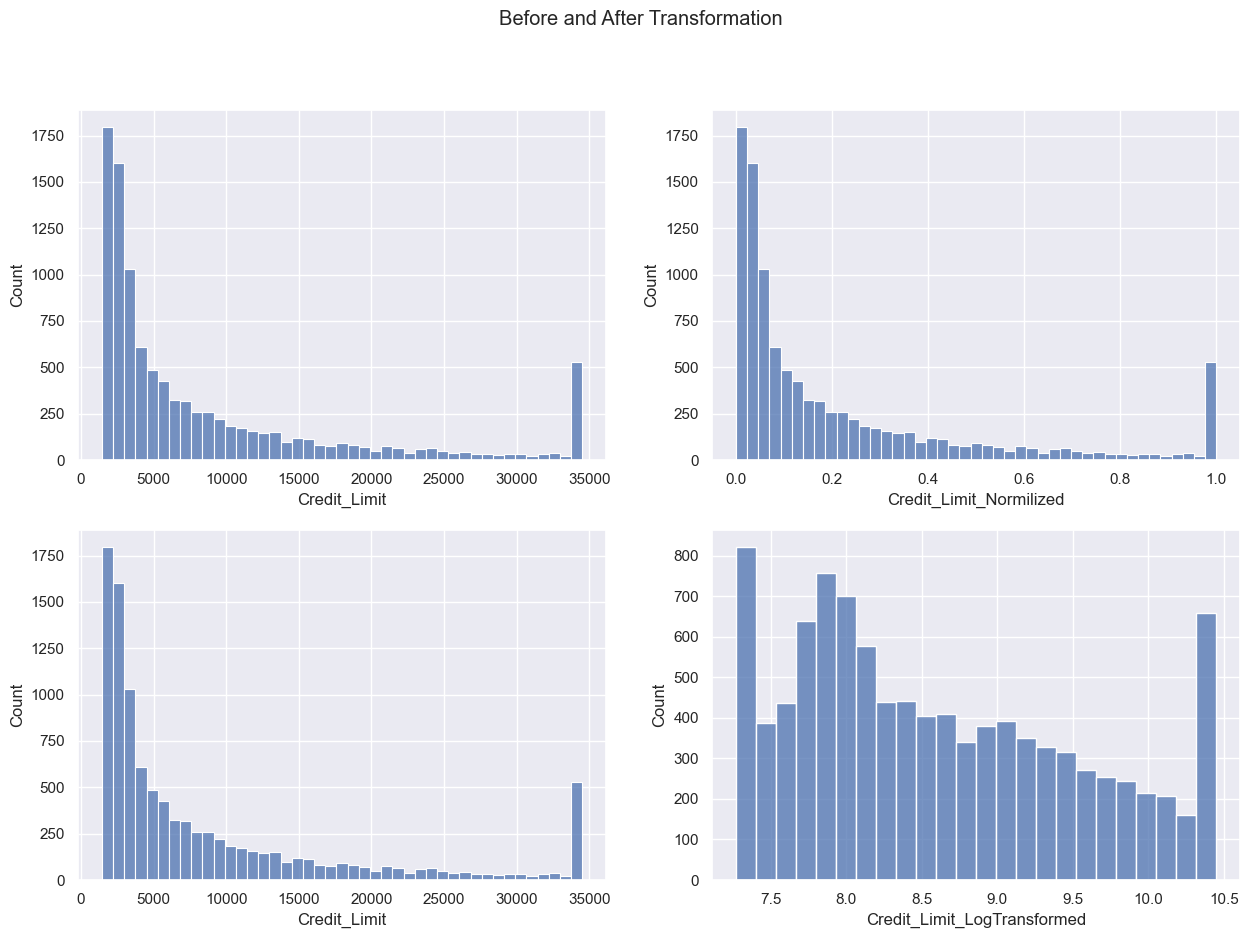

In [155]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Before and After Transformation')

#create boxplot in each subplot
sns.histplot(data, x='Credit_Limit', ax=axes[0,0])
sns.histplot(data, x='Credit_Limit_Normilized', ax=axes[0,1])
sns.histplot(data, x='Credit_Limit', ax=axes[1,0])
sns.histplot(data, x='Credit_Limit_LogTransformed', ax=axes[1,1]);

## Other Distributions Plots

### Box and Wisker Plot

The box and wisker plot allows the analyst to quickly find and identify the median, quatiles and any outliers

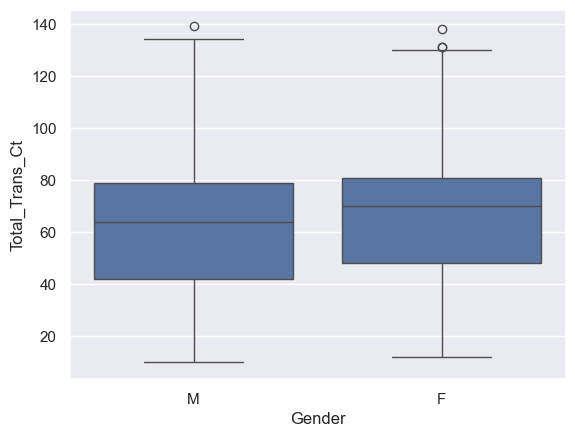

In [156]:
#Total Transaction count by gender
sns.boxplot(x = data['Gender'], y = data['Total_Trans_Ct']);

The graph shows that the median transaction count is slightly higher for female than males, and that outlier are present among both groups.

### Pyramid Chart

Use Plotly an interactive visualization package to visualize a pyramid chart (this is not available in seaborn or matplotlib). Example [here](https://plotly.com/python/v3/population-pyramid-charts/)

In [157]:
#Aggregate the data to the age and group level
pyramid = data.groupby(['Gender', 'Customer_Age_bins'])['CLIENTNUM'].nunique().reset_index()

C:\Users\magal\AppData\Local\Temp\ipykernel_15116\1872898338.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [158]:
pyramid

,Gender,Customer_Age_bins,CLIENTNUM
0,F,20s,93
1,F,30s,956
2,F,40s,2410
3,F,50s,1619
4,F,60s,280
5,F,70s,0
6,M,20s,102
7,M,30s,885
8,M,40s,2151
9,M,50s,1379


In [159]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [160]:
!pip install nbformat

In [161]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [162]:
pip install pip==24.1.2

Note: you may need to restart the kernel to use updated packages.


In [163]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [164]:
women_bins = np.array(-1 * pyramid[pyramid['Gender']=='F']['CLIENTNUM'])
men_bins = np.array(pyramid[pyramid['Gender']=='M']['CLIENTNUM'])

y = list(range(20, 200, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-3000, 3000],
                       tickvals=[-2500, -2000, -1500, -1000, -500,0, 500, 1000, 1500, 2000, 2500],
                       ticktext=[2500, 2000, 1500, 1000, 500,0, 500, 1000, 1500, 2000, 2500],
                       title='Customers'),
                   barmode='overlay',
                   bargap=0.1)

p_data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]



In [165]:
iplot(dict(data=p_data, layout=layout))

## Comparing Categories

Look at credit limit by *Age* and *Gender*

Seaborn [colour palet](https://seaborn.pydata.org/generated/seaborn.color_palette.html) 

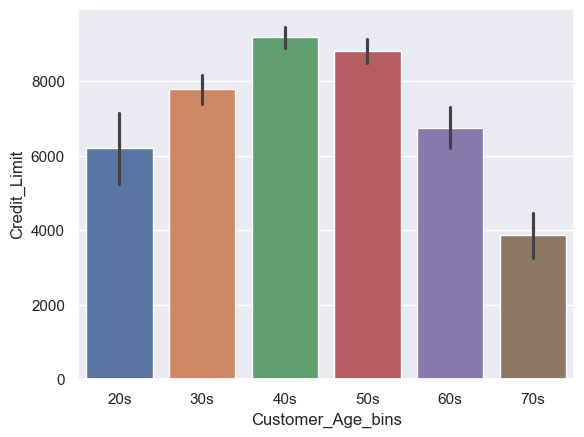

In [166]:
# Create your custom color palette 
custom_palette = sns.color_palette("Set2")

# Assuming 'data' is your DataFrame
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean, hue='Customer_Age_bins', legend=False)

# Show the plot 
plt.show()


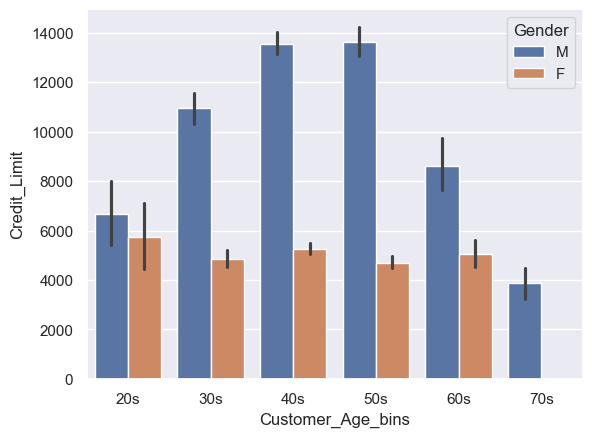

In [167]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean, hue='Gender');

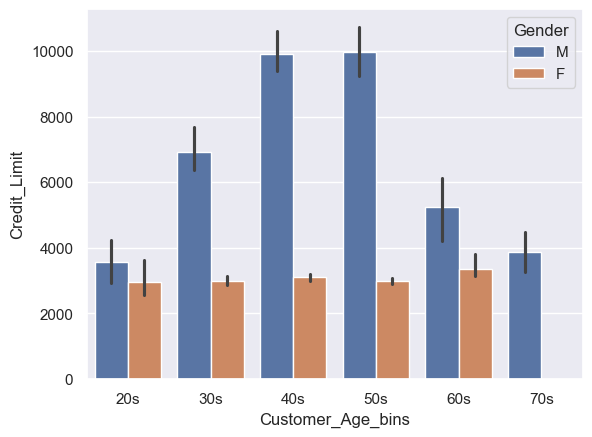

In [168]:
#sanity check: swap the estimator parameter from mean to median
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.median, hue='Gender');

Men on average is getting accepted for higher credit limits than women are at this company. 

In [169]:
#Remove the error bars from the chart

#need to aggregate the values 
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index()
barplot

C:\Users\magal\AppData\Local\Temp\ipykernel_15116\1618414907.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_Age_bins,Gender,Credit_Limit
0,20s,F,5731.101075
1,20s,M,6649.367647
2,30s,F,4867.775314
3,30s,M,10948.605311
4,40s,F,5270.821784
5,40s,M,13557.484844
6,50s,F,4702.649475
7,50s,M,13635.717041
8,60s,F,5053.412857
9,60s,M,8626.832000


This graph shows that the mean was calculated across each age group.

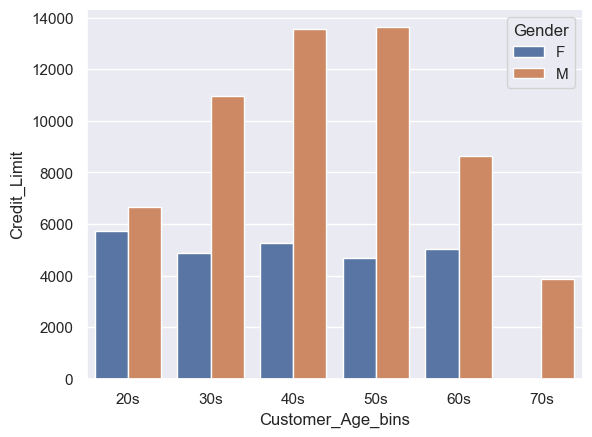

In [170]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=barplot, estimator=np.mean);

Change to horizontal visualization

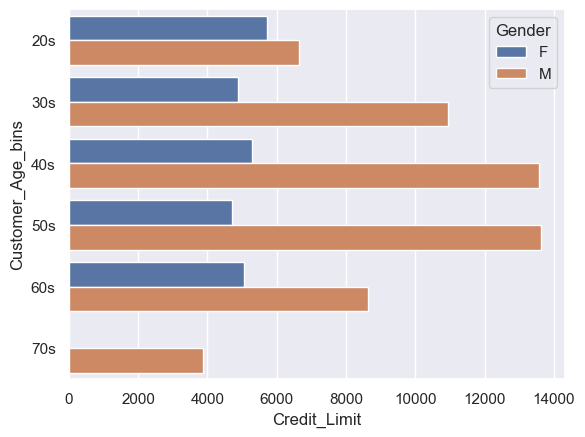

In [171]:
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', hue='Gender', data=barplot, estimator=np.mean, orient='h');

Make a adaptation using lollipop chart

In [172]:
lollipop = data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
lollipop

C:\Users\magal\AppData\Local\Temp\ipykernel_15116\1101180992.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_Age_bins,Credit_Limit
5,70s,3860.500000
0,20s,6211.425128
4,60s,6738.987925
1,30s,7790.933677
3,50s,8811.622181
2,40s,9178.870949


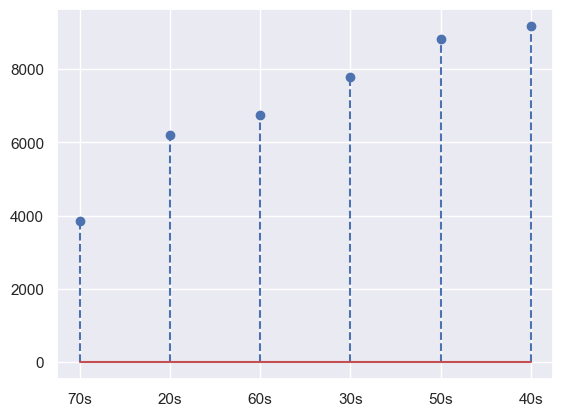

In [173]:
#plotlib has the ability to create the  lollipot chart
plt.stem(lollipop['Customer_Age_bins'], lollipop['Credit_Limit'], linefmt='--');

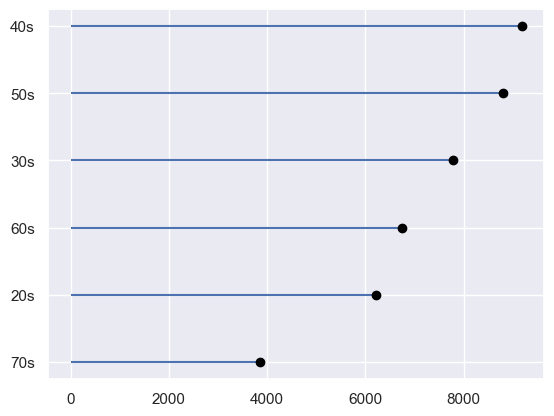

In [174]:
fig, ax = plt.subplots()
ax.hlines(lollipop['Customer_Age_bins'], xmin=0, xmax=lollipop['Credit_Limit'])
ax.plot(lollipop['Credit_Limit'], lollipop['Customer_Age_bins'], 'o', color='black');

More inspirations for [Lollipop chats](https://www.tvhahn.com/posts/beautiful-plots-lollipop/)

## Data Visualization: Data Tables

[Link](https://levelup.gitconnected.com/pivot-tables-in-pandas-7b672e6d8f47) to *A Guide to Pandas Pivot Tables in Python*

Understand the reason customers are leaving.

In [175]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Customer_Age_bins', 'Credit_Limit_Normilized',
       'Credit_Limit_LogTransformed'],
      dtype='object')

In [176]:
#Use aggregated tables
data.groupby(['Attrition_Flag']).agg({'CLIENTNUM':'nunique',
                                      'Customer_Age':'mean',
                                      'Dependent_count':'mean', 'Months_on_book':'mean','Total_Relationship_Count':'mean',
                                      'Months_Inactive_12_mon':'mean',
                                      'Contacts_Count_12_mon':'mean',
                                      'Credit_Limit':'mean',
                                      'Total_Revolving_Bal':'mean',
                                      'Avg_Open_To_Buy':'mean',
                                      'Total_Amt_Chng_Q4_Q1':'mean',
                                      'Total_Trans_Amt':'mean',
                                      'Total_Trans_Ct':'mean',
                                      'Total_Ct_Chng_Q4_Q1':'mean',
                                      'Avg_Utilization_Ratio':'mean'

})

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
Attrited Customer,1627,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,8500,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [177]:
#transpose the table for better visualization
data_pivot = data.groupby(['Attrition_Flag']).agg({'CLIENTNUM':'nunique',
                                      'Customer_Age':'mean',
                                      'Dependent_count':'mean', 'Months_on_book':'mean','Total_Relationship_Count':'mean',
                                      'Months_Inactive_12_mon':'mean',
                                      'Contacts_Count_12_mon':'mean',
                                      'Credit_Limit':'mean',
                                      'Total_Revolving_Bal':'mean',
                                      'Avg_Open_To_Buy':'mean',
                                      'Total_Amt_Chng_Q4_Q1':'mean',
                                      'Total_Trans_Amt':'mean',
                                      'Total_Trans_Ct':'mean',
                                      'Total_Ct_Chng_Q4_Q1':'mean',
                                      'Avg_Utilization_Ratio':'mean'

}).T

data_pivot

Attrition_Flag,Attrited Customer,Existing Customer
CLIENTNUM,1627.000000,8500.000000
Customer_Age,46.659496,46.262118
Dependent_count,2.402581,2.335412
Months_on_book,36.178242,35.880588
Total_Relationship_Count,3.279656,3.914588
Months_Inactive_12_mon,2.693301,2.273765
Contacts_Count_12_mon,2.972342,2.356353
Credit_Limit,8136.039459,8726.877518
Total_Revolving_Bal,672.822987,1256.604118
Avg_Open_To_Buy,7463.216472,7470.273400


In [178]:
#calculate a difference column 
data_pivot['Diff'] = data_pivot['Attrited Customer'] / data_pivot['Existing Customer'] -1

data_pivot.sort_values('Diff')

Attrition_Flag,Attrited Customer,Existing Customer,Diff
CLIENTNUM,1627.000000,8500.000000,-0.808588
Total_Revolving_Bal,672.822987,1256.604118,-0.464570
Avg_Utilization_Ratio,0.162475,0.296412,-0.451860
Total_Trans_Ct,44.933620,68.672588,-0.345683
Total_Trans_Amt,3095.025814,4654.655882,-0.335069
Total_Ct_Chng_Q4_Q1,0.554386,0.742434,-0.253286
Total_Relationship_Count,3.279656,3.914588,-0.162196
Total_Amt_Chng_Q4_Q1,0.694277,0.772510,-0.101271
Credit_Limit,8136.039459,8726.877518,-0.067703
Avg_Open_To_Buy,7463.216472,7470.273400,-0.000945


## Relationships

[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) or [Pairgrid ](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

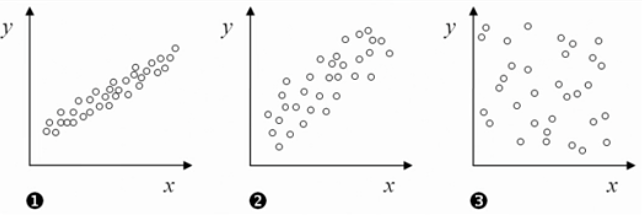

In [185]:
#https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numeric_data = data._get_numeric_data()

In [186]:
#all numeric variables in the dataset 
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Normilized', 'Credit_Limit_LogTransformed'],
      dtype='object')

In [187]:
numeric_data = data[['Credit_Limit', 'Total_Revolving_Bal', 'Months_on_book',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag']]

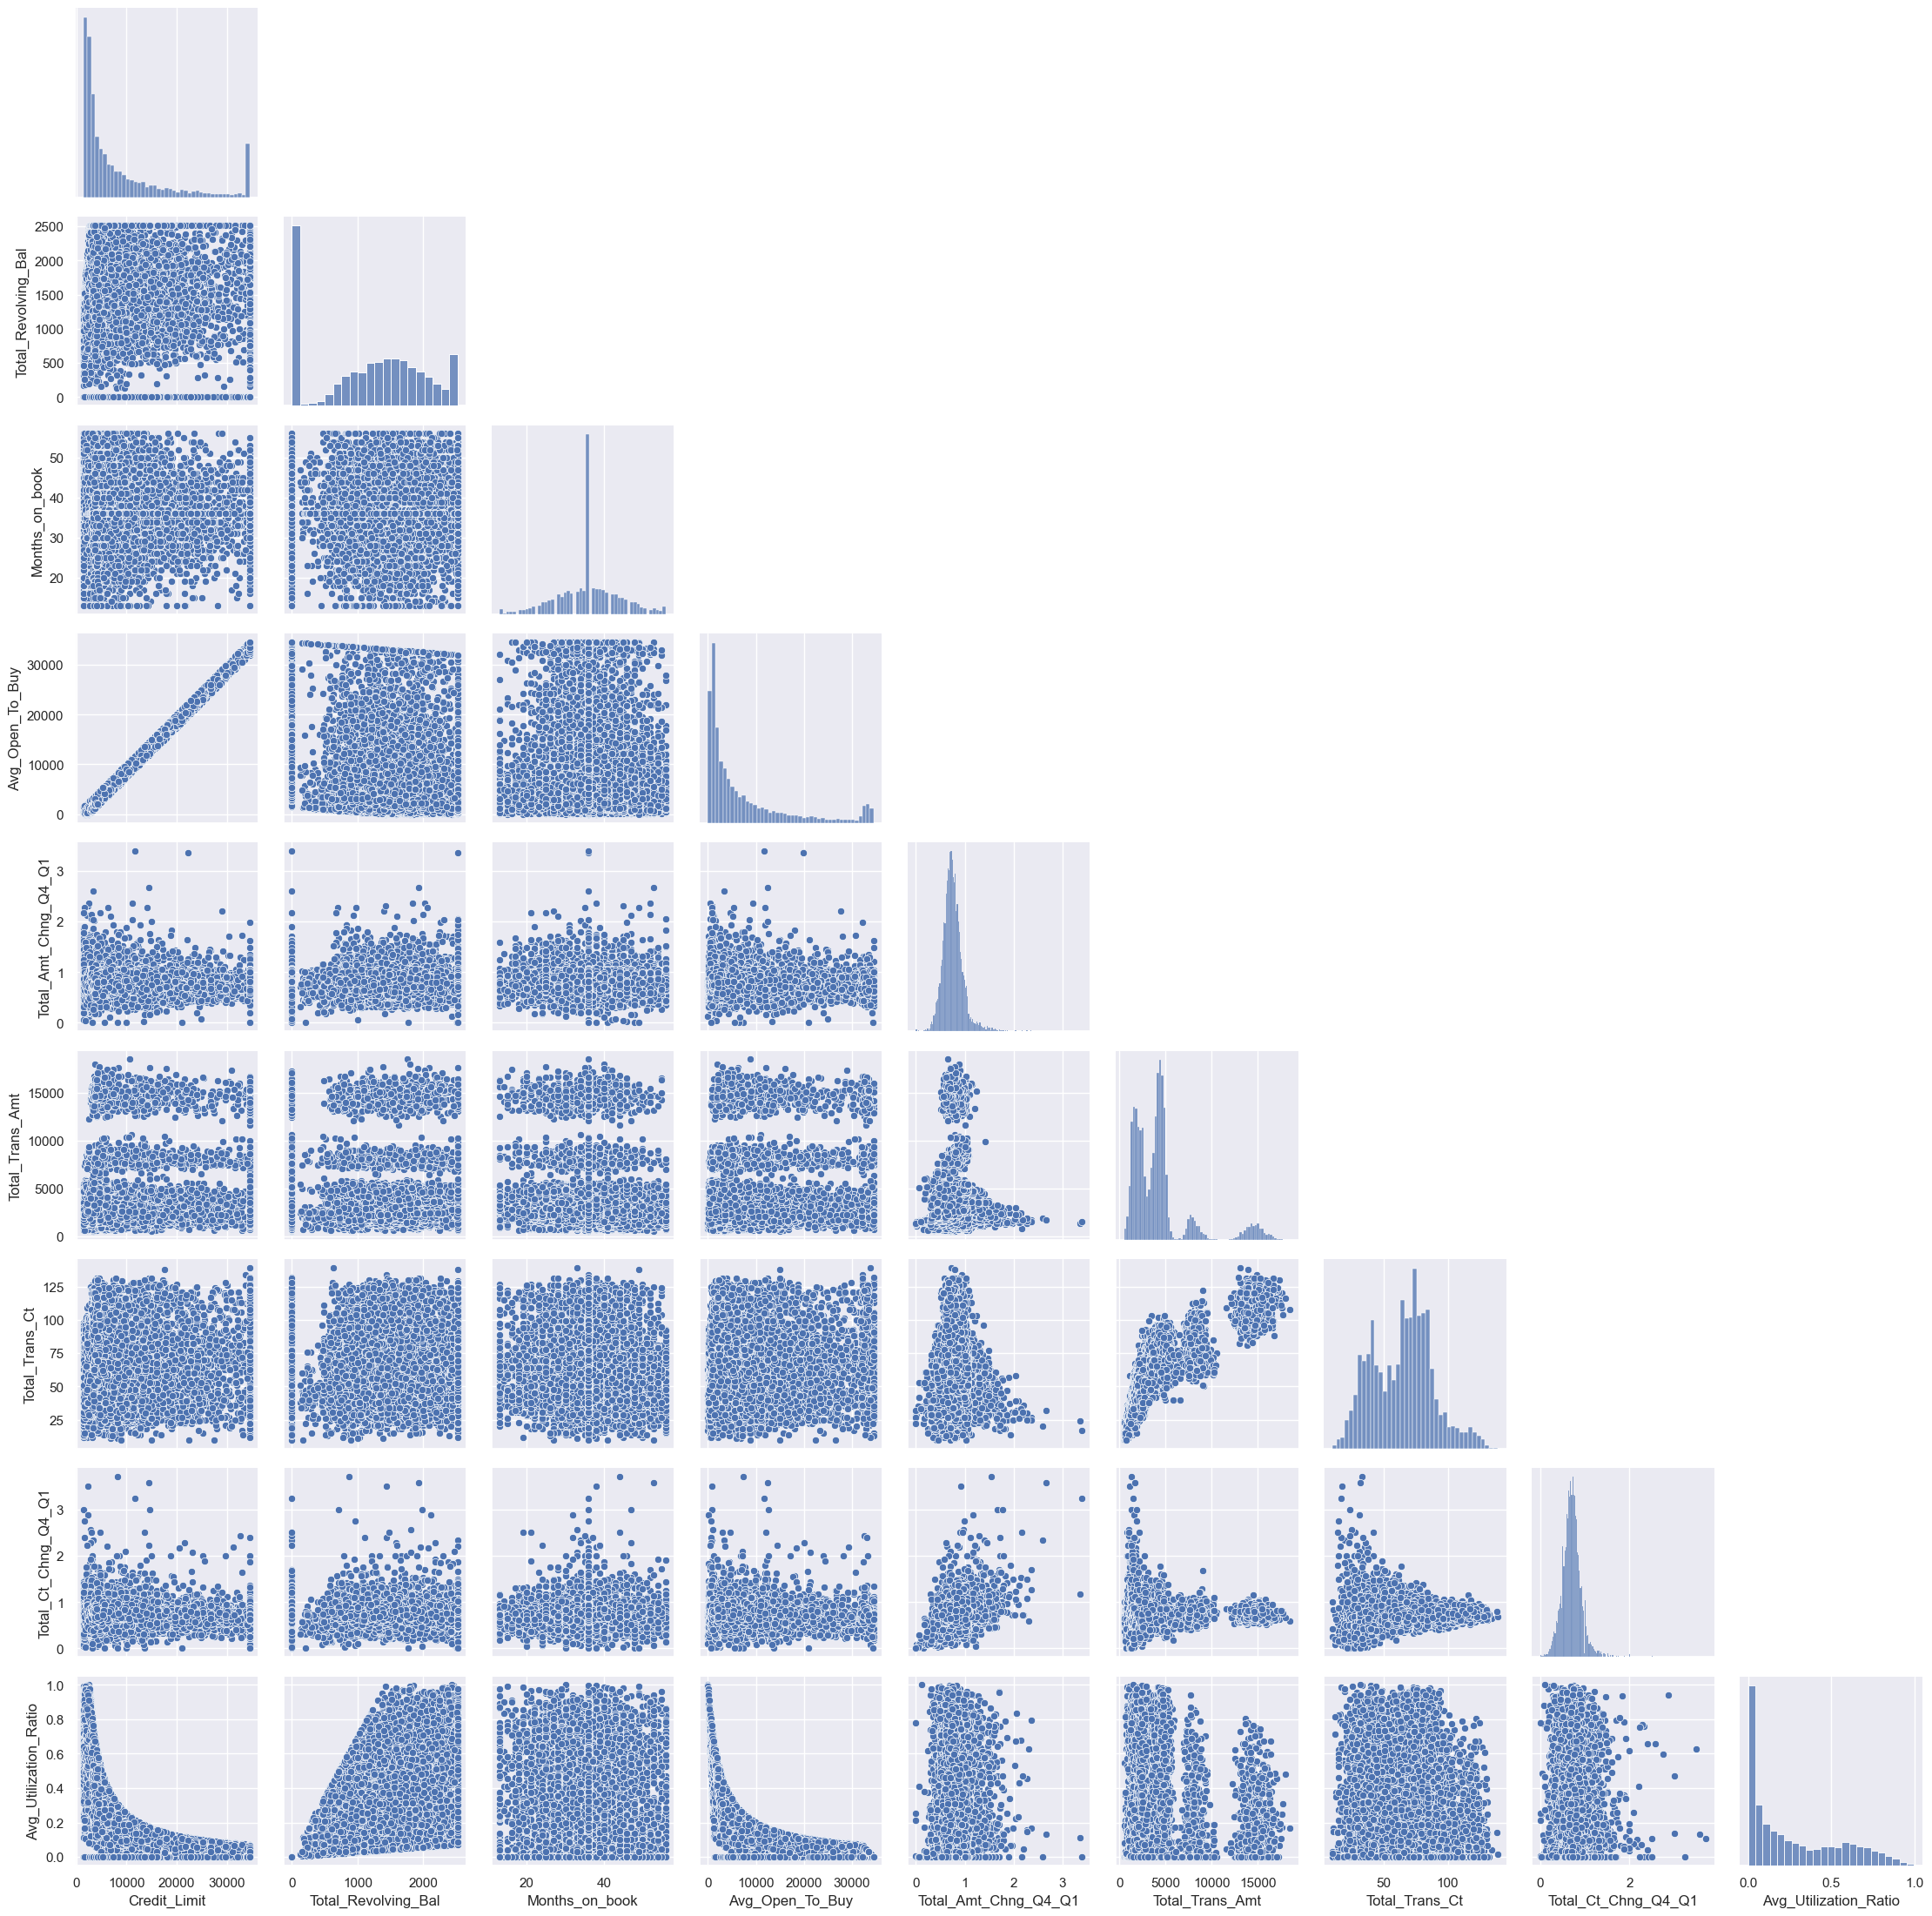

In [188]:
g = sns.PairGrid(numeric_data, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

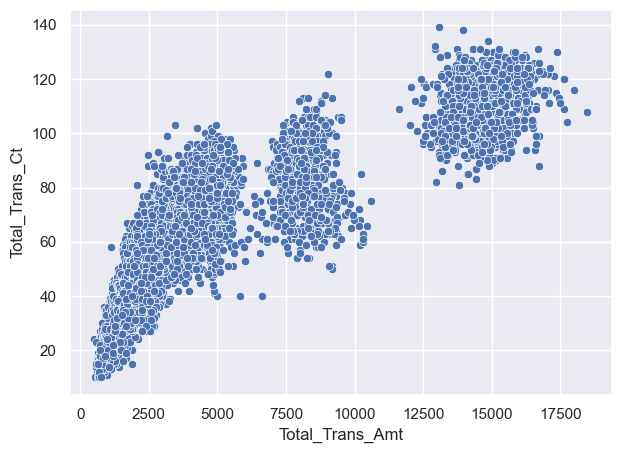

In [189]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data);

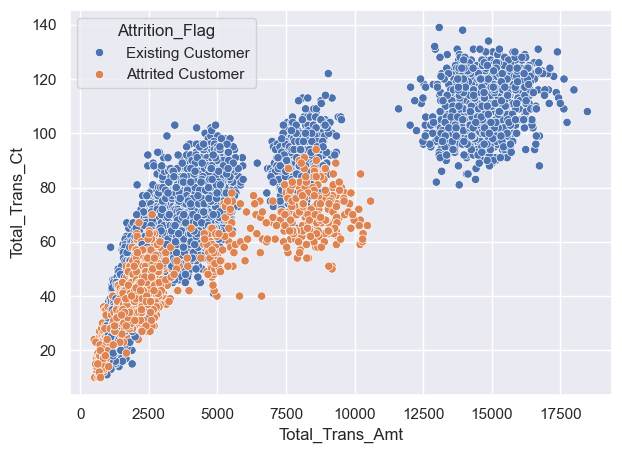

In [190]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct',hue='Attrition_Flag', data=data);

**Finding 1:**
No Attrited Customers who have spent above $11K


## Ridge Plot

Create bins to effectively look at their differences. 

In [196]:
bins = [0, 11000, 900000]
labels = ['Group 1', 'Group 2']
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False)

In [197]:
data.groupby(['Total_Trans_Amt_bin','Attrition_Flag']).agg({
  'CLIENTNUM':'nunique',
  'Customer_Age':'mean',
  'Dependent_count':'mean', 'Months_on_book':'mean','Total_Relationship_Count':'mean',
  'Months_Inactive_12_mon':'mean',
  'Contacts_Count_12_mon':'mean',
  'Credit_Limit':'mean',
  'Total_Revolving_Bal':'mean',
  'Avg_Open_To_Buy':'mean',
  'Total_Amt_Chng_Q4_Q1':'mean',
  'Total_Trans_Amt':'mean',
  'Total_Trans_Ct':'mean',
  'Total_Ct_Chng_Q4_Q1':'mean',
  'Avg_Utilization_Ratio':'mean'

}).T

C:\Users\magal\AppData\Local\Temp\ipykernel_15116\967797865.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Total_Trans_Amt_bin                Group 1                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1627.000000       7753.000000   
Customer_Age                     46.659496         46.373920   
Dependent_count                   2.402581          2.341545   
Months_on_book                   36.178242         35.964272   
Total_Relationship_Count          3.279656          4.064620   
Months_Inactive_12_mon            2.693301          2.279376   
Contacts_Count_12_mon             2.972342          2.369018   
Credit_Limit                   8136.039459       8213.629808   
Total_Revolving_Bal             672.822987       1245.908165   
Avg_Open_To_Buy                7463.216472       6967.721643   
Total_Amt_Chng_Q4_Q1              0.694277          0.772248   
Total_Trans_Amt                3095.025814       3686.943506   
Total_Trans_Ct                   44.933620         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386          0.741687   
Avg_Utilization_Ratio             0.162475          0.307600   

Total_Trans_Amt_bin                Group 2                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Dependent_count                        NaN          2.271754  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

Create KDE plots using [seaborn.FacetGrit](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

(0.0, 2.0)

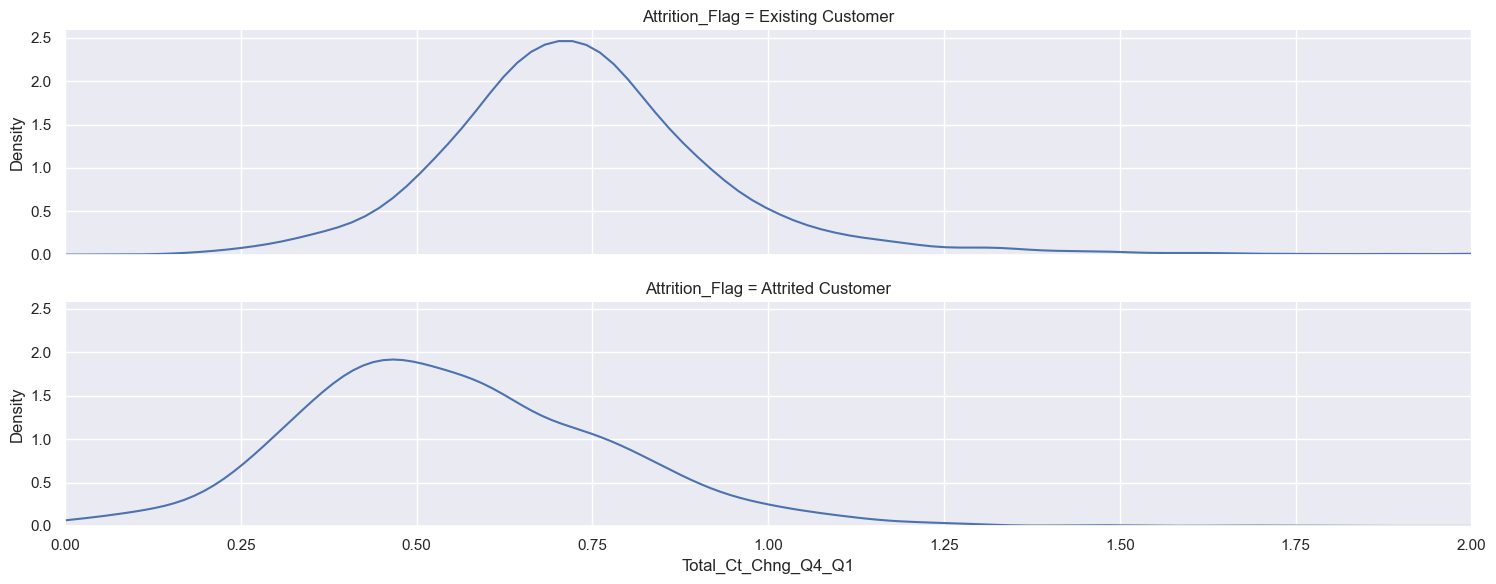

In [198]:
g = sns.FacetGrid(data, row='Attrition_Flag', aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x='Total_Ct_Chng_Q4_Q1')

plt.xlim(0,2)

## Data Visualization and Storytelling

1. Change the background color to white (remove the gridlines)
2. Remove the border

In [199]:
sns.set_theme(style='white')
palette = sns.color_palette('Set2', 12)

Text(12500, 40, 'No Churned Customers \nabove $11k of Spend')

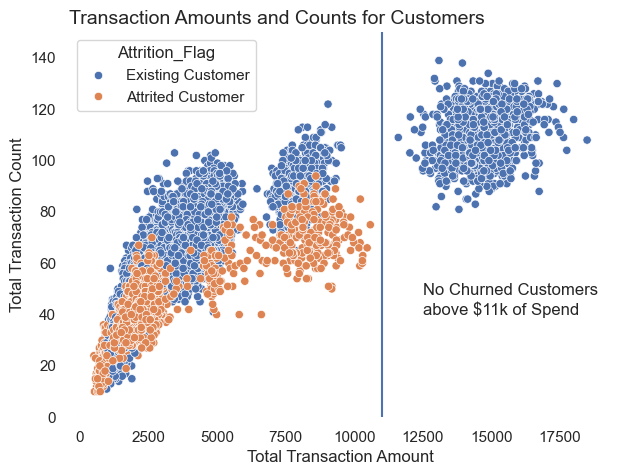

In [203]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct',hue='Attrition_Flag', data=data)
sns.despine(bottom=True, left=True) #removes the border
plt.ylim(0,150) #change the limits of the axis

plt.xlabel('Total Transaction Amount') #axis label
plt.ylabel('Total Transaction Count') #axix label
plt.title('Transaction Amounts and Counts for Customers', 
          loc='left', size=14) #title

plt.vlines(11000, 0, 150) #adds in a vertical line at the $11K mark
plt.text(12500, 40, 'No Churned Customers \nabove $11k of Spend') #annotation


(0.0, 2.0)

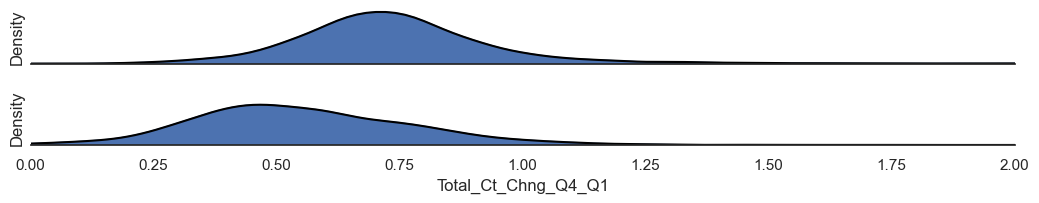

In [209]:
sns.set_theme(style='white')
g = sns.FacetGrid(data, row='Attrition_Flag', aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x='Total_Ct_Chng_Q4_Q1', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x='Total_Ct_Chng_Q4_Q1', color='black')
g.fig.subplots_adjust(hspace=.5)
g.set_titles('')
g.set(yticks=[])
g.despine(left=True)

plt.xlim(0,2)

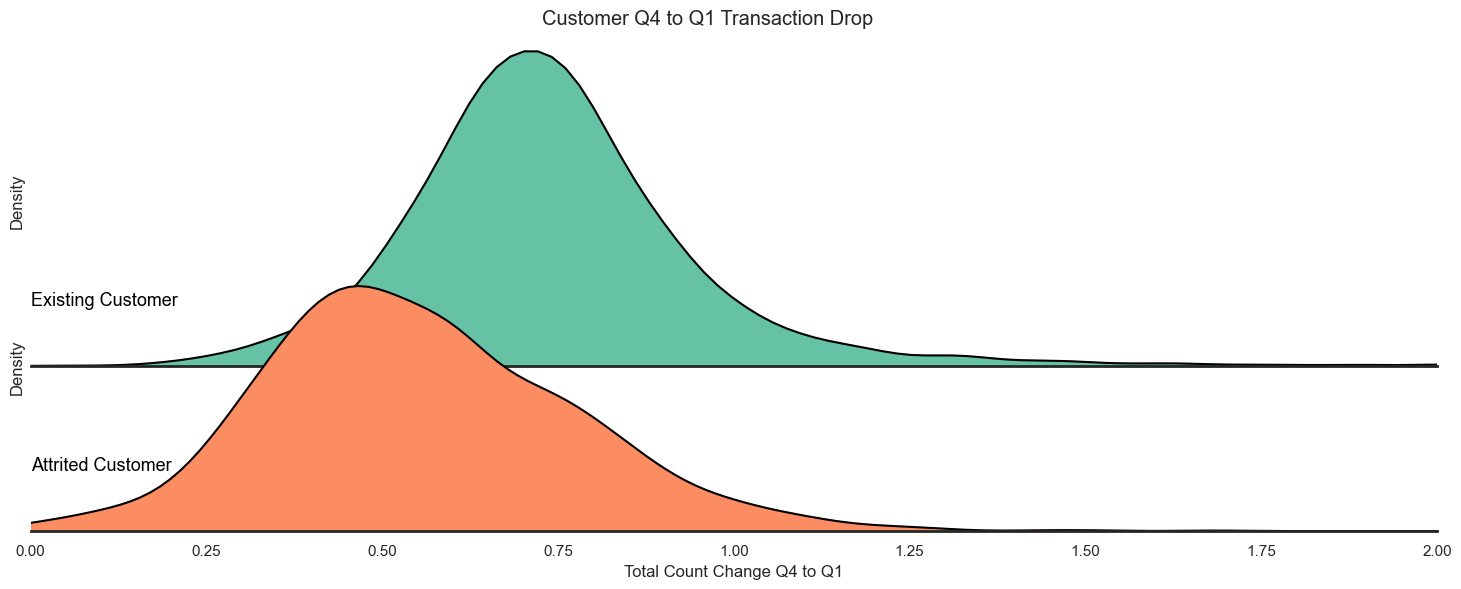

In [210]:
sns.set_theme(style='white', rc={'axes.facecolor':(0,0,0,0), 'axes.linewidth':2})
palette = sns.color_palette('Set2', 12)
g = sns.FacetGrid(data, palette=palette,row='Attrition_Flag', hue='Attrition_Flag', aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x='Total_Ct_Chng_Q4_Q1', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x='Total_Ct_Chng_Q4_Q1', color='black')
def label(x, color, label):
  ax = plt.gca()
  ax.text(0, .2, label, color='black', fontsize=13, 
          ha='left', va='center', transform=ax.transAxes)

g.map(label, 'Attrition_Flag')

g.fig.subplots_adjust(hspace=-.5)
g.set_titles('')
g.set(yticks=[], xlabel='Total Count Change Q4 to Q1')
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)

plt.xlim(0,2);